<a href="https://colab.research.google.com/github/panimesh14/Bayesian-Learning-and-Simulation/blob/main/Gibbs_Sampling_MCMC%20(Markov_Chain_Monte_Carlo_Simulations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gibbs Sampling MCMC Technique for Multivariate distributions using Full Conditionals

In [134]:
import numpy as np, pandas as pd
import scipy as sp

In [121]:
mu=[-2,1];
sigma=[[1,0.6],[0.6,1]];
cov=np.power(sigma,2)

###Gibbs Sampling using Univariate Distributions

In [135]:
def gibbsnormal(N,sigma,burn_in=0.10):
    samples={'x':[1],'y':[1]};#initial guess/start model
    i=0;
    while(i<N):
      new_x=np.random.normal(mu[1]+samples['y'][-1]*sigma[0][1],1-sigma[0][1]**(2));
      new_y=np.random.normal(mu[0]+samples['x'][-1]*sigma[1][0],1-sigma[1][0]**(2));
      samples['x'].append(new_x);
      samples['y'].append(new_y);
      i=i+1;
    return samples

In [136]:
sample=gibbsnormal(10000,cov)

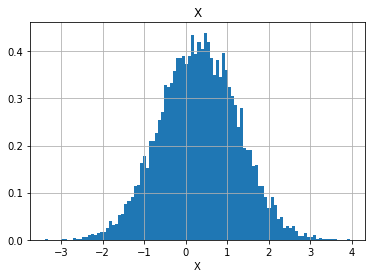

In [141]:

import matplotlib.pyplot as plt
plt.hist(sample['x'],density=True,bins=100)
plt.title('X')
plt.xlabel('X')
plt.grid()

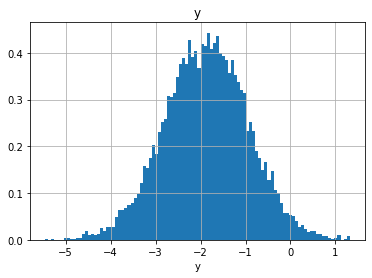

In [142]:
plt.hist(sample['y'],density=True,bins=100)
plt.title('y')
plt.xlabel('y')
plt.grid()

##### Univariate Gibbs Sampling for sampling a 2d distribution is able to approximately match the means for x and y diatributions as 1 and -2 respectively.

#Multivariate Gaussian Sampling using Full Conditionals

In [126]:
import scipy.stats as sp

In [143]:
class multivariate_prob:
      def __init__(self,mu,cov):
      # mu,cov=arrays
          self.mu=np.array(mu);
          self.cov=np.array(cov);

      def conditional_sampling(self,x,index):
          #index=list structure;x=array
          index=index;
          index_minus=[i for i in list(range(len(self.mu))) if i not in [index]]
          x=np.array(x);
          x0=x[index_minus];
          #Mean vectors
          mu1=self.mu[index];
          mu_minus=self.mu[index_minus];
          index=[index]
          #Full conditional Covariance sub-matrices 
          cov11=self.cov[np.ix_(index,index)];
          cov12=self.cov[np.ix_(index,index_minus)];
          cov21=self.cov[np.ix_(index_minus,index)];
          cov22=self.cov[np.ix_(index_minus,index_minus)];
          
          #Full conditional distribution parameters-mean,covariance for each index
          mu_cond=mu1+np.matmul(np.matmul(cov12,np.linalg.inv(cov22)),(x0-mu_minus));
          cov_cond=cov11+np.matmul(np.matmul(cov12,np.linalg.inv(cov22)),cov21);
          #x1=np.random.multivariate_normal(mu_cond,cov_cond);
          x1=sp.multivariate_normal(mu_cond,cov_cond).rvs()
          #print(x1)
          return x1

      def mcmc_gibbs_sampler(self,x_guess,nit=1000): 
          x_samples=[];
          x_init=x_guess;
          burn_in=int(0.10*nit);
          for i in range(nit):
              for j in range(len(x_init)):
                  #print(j)
                  x_init[j]=self.conditional_sampling(x_init,j);#Full Conditional
              x_samples.append(x_init.copy());
              #print(np.vstack(x_samples))
              #print(x_samples)
          return np.vstack(x_samples[burn_in:])

In [128]:
prob_function=multivariate_prob(mu,cov)

In [129]:
x_samples=prob_function.mcmc_gibbs_sampler([0,0],100000)

In [130]:
x_samples

array([[-1.89855677,  1.21095006],
       [-1.7712717 ,  2.57906543],
       [-2.25994225,  0.63364078],
       ...,
       [-2.30988615,  1.49957928],
       [-1.75140432,  1.41376365],
       [ 0.07831195, -0.04208992]])

Correlation Coefficient= 0.3571396613488752


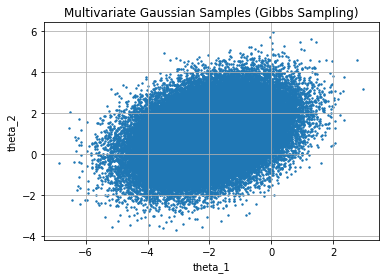

In [131]:
plt.scatter(x_samples[:,0],x_samples[:,1],s=2)
plt.xlabel('theta_1')
plt.ylabel('theta_2')
plt.title('Multivariate Gaussian Samples (Gibbs Sampling)')
plt.grid()
#
corr_coeff=sp.pearsonr(x_samples[:,0],x_samples[:,1])
print('Correlation Coefficient=',corr_coeff[0])

theta1 distribution Mean -2.00821471869729
theta1 distribution Standard Deviation 1.1396873881143923
Standard deviation Error Estimate: 0.1396873881143923
Mean Error Estimate: 0.004107359348644923


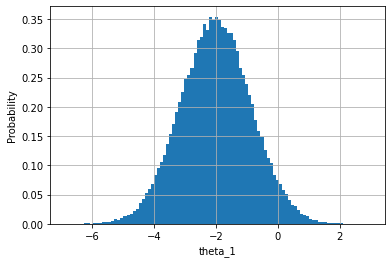

In [132]:
plt.hist(x_samples[:,0],density=True,bins=100)
plt.xlabel('theta_1')
plt.ylabel('Probability')
plt.grid()

# Distribution Parameters
theta_1_mean=np.mean(x_samples[:,0])
theta_1_std=np.std(x_samples[:,0])
print('theta1 distribution Mean',theta_1_mean)
print('theta1 distribution Standard Deviation',theta_1_std)
#distribution mean and standard deviation estimates from samples are quite close to actual values

#Errors in estimates from actuals
std_err=(theta_1_std-sigma[0][0])/sigma[0][0];
print('Standard deviation Error Estimate:',std_err);
mu_err=(theta_1_mean-mu[0])/mu[0];
print('Mean Error Estimate:',mu_err);#not absolute error to get a sense of direction of error

theta2 distribution Mean 0.9950005716032958
theta2 distribution Standard Deviation 1.1351770317422998
Standard deviation Error Estimate: 0.13517703174229978
Mean Error Estimate: -0.0049994283967041975


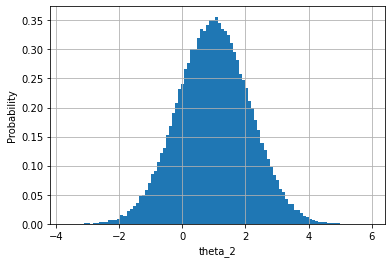

In [133]:
plt.hist(x_samples[:,1],density=True,bins=100)
plt.xlabel('theta_2')
plt.ylabel('Probability')
plt.grid()

#Distribution Parameters
theta_2_mean=np.mean(x_samples[:,1])
theta_2_std=np.std(x_samples[:,1])
print('theta2 distribution Mean',theta_2_mean)
print('theta2 distribution Standard Deviation',theta_2_std)
#distribution mean and standard deviation estimates from samples are quite close to actual values

#Error estimates
std_err=(theta_2_std-sigma[1][1])/sigma[1][1];
print('Standard deviation Error Estimate:',std_err);
mu_err=(theta_2_mean-mu[1])/mu[1];
print('Mean Error Estimate:',mu_err);#Not absolute error

##### Gibbs sampling seems effective at sampling distributions with given means and covariance matrices given it effectively samples with respect to given means.
##### Error estimates appear relatively convincing of the MCMC Gibbs sampling technique's efficiency.
##### Multivariate sampling using full conditionals seems effective for sampling distributions. Here, only full conditional over means has been used.